<a href="https://colab.research.google.com/github/woogi123/LA2/blob/main/ex02_transform_tiefighter_%EB%B0%B0%ED%8F%AC_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [39]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [82]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [83]:
def draw_circle(ax, x, y, r):
  theta = np.linspace(0, 2*np.pi, 100)
  x_vals = x + r * np.cos(theta)
  y_vals = y + r * np.sin(theta)
  ax.plot(x_vals, y_vals)

In [93]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)
  draw_circle(ax, 0, 0, 500)

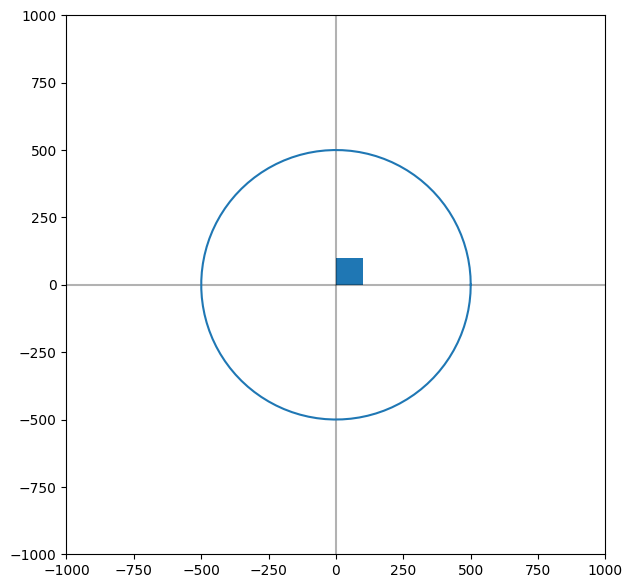

In [94]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [95]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [96]:
# 회전함수 구현
def rotate(p, theta):
  
  #각을 라디안으로 변환
  radians = np.deg2rad(theta)

  cos_radians = np.cos(radians)
  sin_radians = np.sin(radians)

  #회전 변환 행렬
  matrix = np.array([[cos_radians,-sin_radians], [sin_radians, cos_radians]])
  return np.dot(matrix, p)


In [97]:
def scale(p, sx, sy):

  # 동차좌표계로 전환
  p = np.array([p[0], p[1], 1.0])

  # Scaling 변환 행렬 생성
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])

  #행렬과 벡터 곱
  q = np.dot(m,p)

  #2차원 좌표계로 전환
  q = np.array([q[0], q[1]])

  return q

In [98]:
def shear_x(p, sx):

  #동차좌표계로 전환
  p = np.array([p[0], p[1], 1.0])

  # Shearing 변환 행렬 생성
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

  #행렬과 벡터 곱
  q = np.dot(m, p)

  #2차원 좌표계로 전환
  q = np.array([q[0], q[1]])

  return q

In [99]:
def shear_y(p, sy):
  #동차좌표계로 전환
  p = np.array([p[0], p[1], 1.0])

  # Shearing 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])

  #행렬과 벡터 곱
  q = np.dot(m,p)

  #2차원 좌표계로 전환
  q = np.array([q[0], q[1]])

  return q

In [100]:
def reflect_x(p):
  #동차좌표계로 전환
  p = np.array([p[0], p[1], 1.0])

  # Shearing 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])
  
  #행렬과 벡터 곱
  q = np.dot(m,p)

  #2차원 좌표계로 전환
  q = np.array([q[0], q[1]])

  return q

In [101]:
def reflect_y(p):
  #동차좌표계로 전환
  p = np.array([p[0], p[1], 1.0])

  # Shearing 변환 행렬 생성
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  
  #행렬과 벡터 곱
  q = np.dot(m,p)

  #2차원 좌표계로 전환
  q = np.array([q[0], q[1]])

  return q

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [102]:
#중앙 조종석 구현
def draw_cockpit(ax, p1, p2, p3, p4):
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)


  # 크기 조절
  sx = 5
  sy = 5
  q1 = scale(q1,sx,sy)
  q2 = scale(q2,sx,sy)
  q3 = scale(q3,sx,sy)
  q4 = scale(q4,sx,sy)

  #사각형을 rotate 함수를 사용하여 회전시킴
  angle = 45

  q1 = rotate(q1, angle)
  q2 = rotate(q2, angle)
  q3 = rotate(q3, angle)
  q4 = rotate(q4, angle)
  

  draw_rectangle(ax, q1, q2, q3, q4)

In [103]:
# 왼쪽 날개축을 구현
def draw_left_arm(ax, p1, p2, p3, p4):

  # 사각형을 우측 하단으로 보내기
  q1 = translate(p1, LEN*2, -LEN/2)
  q2 = translate(p2, LEN*2.5, -LEN/2)
  q3 = translate(p3, LEN*2.5, -LEN)
  q4 = translate(p4, LEN*2, -LEN)

  # x좌표를 Shear_x 함수를 사용하여 기울임
  q1 = shear_x(q1, 5)
  q2 = shear_x(q2, 5)
  q3 = shear_x(q3, 5)
  q4 = shear_x(q4, 5)


  #크기 조절
  sx = 3
  sy = 2
  q1 = scale(q1,sx,sy)
  q2 = scale(q2,sx,sy)
  q3 = scale(q3,sx,sy)
  q4 = scale(q4,sx,sy)


  draw_rectangle(ax, q1, q2, q3, q4)

  # reflect_y을 이용해 y축 반사
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  #y축 반사된 사각형 구현
  draw_rectangle(ax, q1, q2, q3, q4)

  return q1, q2, q3, q4

In [104]:
#오른쪽 날개축을 구현
def draw_right_arm(ax, p1, p2, p3, p4):
  # draw_left_wing의 p1, p2, p3, p4 들여오기
  p1, p2, p3, p4 = draw_left_arm(ax, p1,p2,p3, p4)

  # reflect_x을 이용해 x축반사
  q1 = reflect_x(p1)
  q2 = reflect_x(p2)
  q3 = reflect_x(p3)
  q4 = reflect_x(p4)

  #y축 반사된 사각형 구현
  draw_rectangle(ax, q1, q2, q3, q4)

  # reflect_y을 이용해 y축반사
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  #y축 반사된 사각형 구현
  draw_rectangle(ax, q1, q2, q3, q4)






In [105]:
def draw_left_wing(ax, p1, p2, p3, p4):
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 좌표를 수정하여 왼쪽 날개 구현
  q1 = translate(q1, -LEN*8, -LEN*5)
  q2 = translate(q2, -LEN*10.5, -LEN*7)
  q3 = translate(q3, -LEN*10.5, LEN*7)
  q4 = translate(q4, -LEN*8, LEN*5)



  draw_rectangle(ax, q1, q2, q3, q4)

  return q1, q2, q3, q4

In [106]:
def draw_right_wing(ax, p1, p2, p3, p4):
  #left_wing의 q1, q2, q3, q4를 가져옴
  q1, q2, q3, q4 = draw_left_wing(ax, p1, p2, p3, p4)

  # left_wing을 reflect_y 해서 y축반사
  q1 = reflect_y(q1) 
  q2 = reflect_y(q2) 
  q3 = reflect_y(q3) 
  q4 = reflect_y(q4) 

  draw_rectangle(ax, q1, q2, q3, q4)


In [205]:
def draw_left_eye(ax, x, y, r):
  #눈 생성
  draw_circle(ax, x, y, r)
  draw_circle(ax, x, y, 10)

In [206]:
def draw_right_eye(ax, x, y, r):
  #x좌표 반대로
  x = -x
  draw_circle(ax, x, y, r)
  draw_circle(ax, x, y, 10)

In [207]:
def draw_eyebrow(ax, p1, p2, p3, p4):
  #원점으로 이동
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  #눈썹부위 찾아가기
  q1 = translate(q1, -LEN*4, LEN*5)
  q2 = translate(q2, -LEN*3, LEN*5)
  q3 = translate(q3, -LEN*3, LEN*5)
  q4 = translate(q4, -LEN*4, LEN*5)

  draw_rectangle(ax, q1, q2, q3, q4)
  
  # reflect_y 해서 y축반사
  q1 = reflect_y(q1) 
  q2 = reflect_y(q2) 
  q3 = reflect_y(q3) 
  q4 = reflect_y(q4)

  draw_rectangle(ax, q1, q2, q3, q4)

In [208]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])


  
  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)
  draw_right_arm(ax, p1, p2, p3, p4)
  draw_left_arm(ax, p1, p2, p3, p4)
  draw_left_wing(ax, p1, p2, p3, p4)
  draw_right_wing(ax, p1, p2, p3, p4)

  #추가
  draw_left_eye(ax, -300, 300, 50)
  draw_right_eye(ax, -300, 300, 50)
  draw_tie(ax, p1, p2, p3, p4)
  draw_eyebrow(ax, p1, p2, p3, p4)

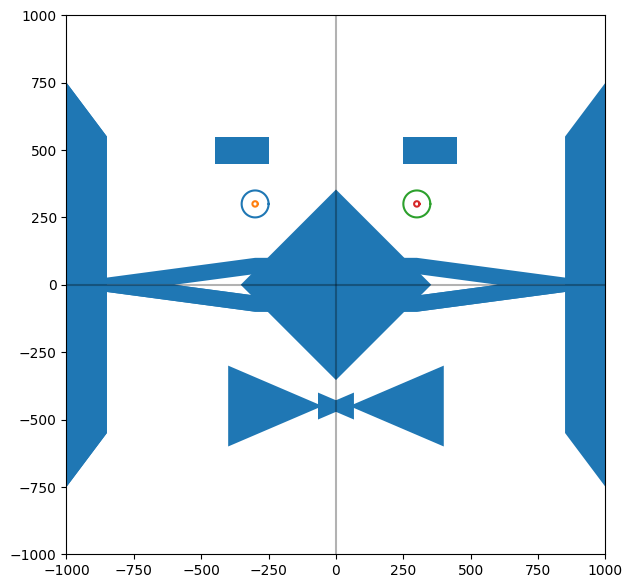

In [209]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 3. main

In [187]:
def draw_tie(ax, p1, p2, p3, p4):

  q1 = translate(p1, -LEN*2/3, -LEN*5)
  q2 = translate(p2, 3*LEN, -LEN*3)
  q3 = translate(p3, 3*LEN, -LEN*7)
  q4 = translate(p4, -LEN*2/3, -LEN*5)

  draw_rectangle(ax, q1, q2, q3, q4)

  # left_wing을 reflect_y 해서 y축반사
  q1 = reflect_y(q1) 
  q2 = reflect_y(q2) 
  q3 = reflect_y(q3) 
  q4 = reflect_y(q4) 
  
  draw_rectangle(ax, q1, q2, q3, q4)